#covid-19 chest x ray analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
cd "/content/drive/My Drive/covid-19_dataset"

/content/drive/My Drive/covid-19_dataset


#dataset

link 
*  https://github.com/ieee8023/covid-chestxray-dataset

#modules import



*   Pandas = reading csv file
*   os =acessing and joing directories and paths
*   shutil =copying image from one folder to  another
*   cv2 = reading images from directory
*   random= shuflling the input data set
*   pickle = saving values obtained of x and y 
*   numpy =resizing array and converting image matrix to numpy array
*   tensorflow = using backend 
*   sequential = combining layers of convolutional 
*   Dense = densing conv2d layer 
*   Dropout = removing few layers 
*    Activation= activation function call
*    Flatten = flatenning dnese layer
*   Conv2D= extracting features in 2d format
*   MaxPooling2D= pool adding
*   BatchNormalization= normalizing batch
*   model_from_json =  save model json format
*   load_model= load the model
*   train_test_split= split test and train data 
*   SGD= used in mlp 








In [ ]:
import pandas as pd
import os
import shutil
import cv2
import random
import pickle
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

Using TensorFlow backend.


# csv reading

*   reading csv file
*   finding distinct diseases in csv file under "finding column"
*   type of images analysis(ct ,x-ray)
*   type of views in those images (lateral,posterior etc.)

In [ ]:
df=pd.read_csv("metadata.csv")

In [ ]:
categories=df.finding.unique()
print(categories)

['COVID-19' 'ARDS' 'SARS' 'Pneumocystis' 'Streptococcus' 'No Finding'
 'Chlamydophila' 'E.Coli' 'COVID-19, ARDS' 'Klebsiella' 'Legionella']


In [ ]:
modality=df.modality.unique()
modality_xray=modality[0]
modality_ct=modality[1]
print(modality_ct,modality_xray)

CT X-ray


In [ ]:
view=df.view.unique()
print(view)

['PA' 'AP' 'L' 'Axial' 'AP Supine' 'Coronal' 'AP semi erect']


#image seperation from csv

##run only once

In [ ]:
pip install tf-nightly

     |████████████████████████████████| 526.3MB 35kB/s 
     |████████████████████████████████| 3.0MB 53.5MB/s 
     |████████████████████████████████| 460kB 48.8MB/s 


## creating directory named on each disease type 

*   defining a path where images to be trained will reside 
*   for each type of disease creating another folder named repectively

EXAMPLE
*   dataset/train/covid19
*   dataset/train/ARDS

In [ ]:
#import os
# define the name of the directory to be created
path = "dataset/train"
for category in categories:
  try:
      dir = os.path.join(path,category)
      os.mkdir(dir)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path) 

Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 
Successfully created the directory dataset/train 


## transfering image to their respective directory

*   src = where all type of images reside 
*   path = destination where they need to be copied 
*   row= with the help of csv file acess name of images and its diseaase name 
*   copy image to its destination using shutil.copy

In [ ]:
#import shutil
src='images'
path = "dataset/train"
for category in categories:
  dir=os.path.join(path,category)
  row=df.loc[df['finding'] == category]['filename']
  for r in row:
    s=os.path.join(src,r)
    #print(s,dir)
    try:
      shutil.copy2(s,dir)
    except:
      continue
  #print(row)

#creating X and Y

*   DATADIR = directory where images to be trained reside 
*   IMG_SIZE= size of image fixed for all images (resize image)
*   categories = classes (list of distinct diseases)
*   training_data= will contain map of image and its coresponding class
*   class _num= gets index value of disease in categories 
FOR EACH IMG IN PATH 
*   img_arr= read image as array with open cv in grey format (you change it to color)
*   new_arr= resizing each image 
*   adding resized image into training_data with its class_num
*   shuffling training_data


In [ ]:
#import cv2
#import random
#import pickle
DATADIR = "dataset/train"
# The size of the images that your neural network will use
IMG_SIZE = 50
# defining CATEGORIES
CATEGORIES=list(categories)
#defining traing data
training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img),0)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
		    #mapping image with its class
				training_data.append([new_array, class_num])
			except Exception as e:
				print(e)
				pass

create_training_data()

random.shuffle(training_data)




## x and y seperation

*   X =contains all images as array that goes for training model from training_data
*   y = conatins classes with respect to each imagefrom training_data
*   np.array().reshape() = reducing dimension of X

In [ ]:
X = [] #features
y = [] #labels

for features, label in training_data:
  #print(features.shape)
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
#X = np.asarray(X)
print(X.shape)
#print(X)

(397, 50, 50)


#creating pickle file

*   X.pickle = saving values of X for further use in pickle file format 
*   y.pickle = saving values of Y for further use in pickle file format

In [ ]:
# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# Try Model

#model1

*   model type= sequential()
*   layer type = convolution 2d 
*   window size (kernel)= 3*3 
*   no of filters = 32->32->64->64->128->128->512->128->total_no_classes
*   operations in between =batch_normalization->(batch_normalization->maxpooling->dropout)->(batch_normalization->dropout)->(batch_normalization->dropout)->(batch_normalization->maxpooling->dropout)->[now moving towards flattening of layers ]->flatten->(batch_normalization->dropout)->(batch_normalization->dropout)
*  internal activation function =relu 
*  outer activation function = softmax
*  type of loss function =sparse_categorial_cross_entropy
*  optimizer="adam"
*  metrics='accuracy'

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import SGD

#df = read_csv("credit_count.txt")
# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
# normalizing data (a pixel goes from 0 to 255)
#X = X/255.0

Y = pickle.load(open("y.pickle", "rb"))
X = X/255.0

''''''
#conv
input_shape = X.shape[1:]
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(BatchNormalization())

model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))


model1.add(Dense(12, activation='softmax'))

model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
sgd = SGD(lr = 0.1, momentum = 0.9)
#model.compile(optimizer = "adam", loss = 'binary_crossentropy',  metrics = ['binary_accuracy'])

#model2

*   model type= sequential()
*   layer type = convolution 2d 
*   window size (kernel)= 3*3 
*   no of filters = (32->32->32)->(64->64)->(64->64)->(128,128)->(128,128)->(256->256)->256->512->128->total_no_classes
*   operations in between =batch_normalization->(batch_normalization->maxpooling->dropout)->(batch_normalization->dropout)->(batch_normalization->dropout)->(batch_normalization->maxpooling->dropout)->[now moving towards flattening of layers ]->flatten->(batch_normalization->dropout)->(batch_normalization->dropout)
*  internal activation function =relu 
*  outer activation function = softmax
*  type of loss function =sparse_categorial_cross_entropy
*  optimizer="adam"
*  metrics='accuracy'

In [ ]:
from tensorflow.keras.layers import MaxPooling2D as MaxPool2D
#df = read_csv("credit_count.txt")
# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
# normalizing data (a pixel goes from 0 to 255)
#X = X/255.0

Y = pickle.load(open("y.pickle", "rb"))
X = X/255.0

input_shape = X.shape[1:]
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

print(1)

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

print(2)

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

print(3)

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

print(4)

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

print(5)

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(MaxPool2D(pool_size=(2, 2)))
print(6)

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(MaxPool2D(pool_size=(2, 2)))
print(7)

#dense block with activation function
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

1
2
3
4
5
6
7


confirming type of array to be passesd in model to fit

In [ ]:
print(type(X))
Y=np.array(Y)
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


* fitting model with batch size 10 epochs as 100 and split as 1% data for validation
* converting  model in json format thus easy to save and read and acess
*  **saving its weights in h5 format 
these weights can be reused in other model hence its a good habit to save weights of a model ,trained mode**

###model1 fit

In [ ]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images

history = model.fit(X, Y, batch_size=10, epochs=100, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')



Epoch 1/100
36/36 [==============================] - 1s 34ms/step - loss: 3.6226 - accuracy: 0.1120 - val_loss: 2.0647 - val_accuracy: 0.8250
Epoch 2/100
36/36 [==============================] - 1s 22ms/step - loss: 3.0101 - accuracy: 0.1737 - val_loss: 1.6001 - val_accuracy: 0.8250
Epoch 3/100
36/36 [==============================] - 1s 22ms/step - loss: 2.6451 - accuracy: 0.2605 - val_loss: 1.5054 - val_accuracy: 0.8250
Epoch 4/100
36/36 [==============================] - 1s 22ms/step - loss: 2.2554 - accuracy: 0.3193 - val_loss: 1.2196 - val_accuracy: 0.8250
Epoch 5/100
36/36 [==============================] - 1s 22ms/step - loss: 2.0022 - accuracy: 0.4370 - val_loss: 1.0089 - val_accuracy: 0.8250
Epoch 6/100
36/36 [==============================] - 1s 22ms/step - loss: 1.7107 - accuracy: 0.5014 - val_loss: 0.8600 - val_accuracy: 0.8250
Epoch 7/100
36/36 [==============================] - 1s 22ms/step - loss: 1.4938 - accuracy: 0.6134 - val_loss: 0.8594 - val_accuracy: 0.8250
Epoch 

### model2 fit

In [ ]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images

history1 = model1.fit(X, Y, batch_size=10, epochs=100, validation_split=0.1)

# Saving the model
model1_json = model1.to_json()
with open("model1.json", "w") as json_file :
	json_file.write(model1_json)

model.save_weights("model1.h5")
print("Saved model to disk")

model.save('CNN1.model')



Epoch 1/100
36/36 [==============================] - 1s 18ms/step - loss: 0.2573 - accuracy: 0.9076 - val_loss: 0.6610 - val_accuracy: 0.8000
Epoch 2/100
36/36 [==============================] - 1s 15ms/step - loss: 0.3108 - accuracy: 0.8880 - val_loss: 0.8680 - val_accuracy: 0.8000
Epoch 3/100
36/36 [==============================] - 1s 15ms/step - loss: 0.2946 - accuracy: 0.9076 - val_loss: 0.8595 - val_accuracy: 0.6750
Epoch 4/100
36/36 [==============================] - 1s 16ms/step - loss: 0.2492 - accuracy: 0.9188 - val_loss: 0.7399 - val_accuracy: 0.8000
Epoch 5/100
36/36 [==============================] - 1s 14ms/step - loss: 0.3256 - accuracy: 0.8739 - val_loss: 0.8111 - val_accuracy: 0.8250
Epoch 6/100
36/36 [==============================] - 1s 15ms/step - loss: 0.2817 - accuracy: 0.9132 - val_loss: 0.6307 - val_accuracy: 0.7750
Epoch 7/100
36/36 [==============================] - 1s 15ms/step - loss: 0.2308 - accuracy: 0.9160 - val_loss: 0.6791 - val_accuracy: 0.7500
Epoch 

###model 1 graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


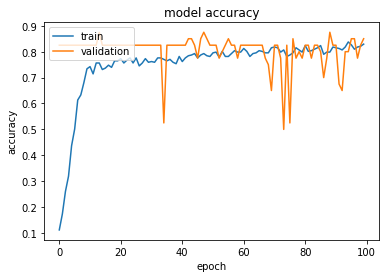

In [ ]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

###model2 graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


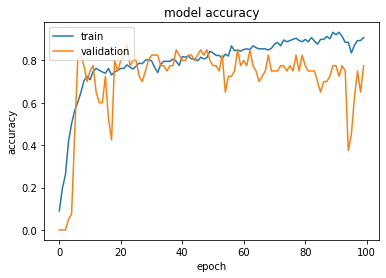

In [ ]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

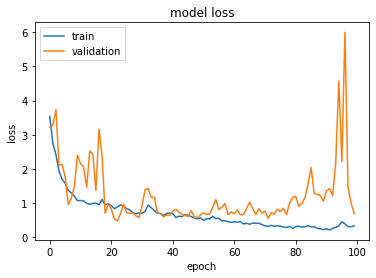

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
model.evaluate(X_test,y_test,batch_size=20,verbose=0)

[0.2506026327610016, 0.9166666865348816]

In [ ]:
model.predict(X_test,batch_size=20)

array([[7.26218879e-01, 1.79021023e-04, 1.68166967e-04, 3.12675885e-03,
        1.91955850e-03, 2.64524966e-01, 1.92392862e-03, 3.50094720e-04,
        2.54574377e-04, 1.18084881e-03, 1.28131520e-04, 2.50848152e-05],
       [9.72814202e-01, 1.63090430e-04, 6.63830651e-05, 1.67504873e-03,
        3.22476844e-04, 2.38680542e-02, 1.01727819e-04, 1.91820131e-04,
        5.75538143e-04, 1.05615698e-04, 1.13106886e-04, 2.98469081e-06],
       [9.70547259e-01, 2.58900458e-04, 8.09174235e-05, 2.87590246e-03,
        5.81187545e-04, 2.42485050e-02, 1.44481237e-04, 1.28945729e-04,
        8.37418309e-04, 1.71240128e-04, 1.22075449e-04, 3.10981977e-06],
       [9.54725325e-01, 3.02022439e-04, 1.95832551e-03, 7.78442656e-04,
        4.91875922e-04, 7.43477652e-03, 2.51212012e-04, 3.01906969e-02,
        8.15655047e-04, 4.78099028e-05, 2.99815857e-03, 5.69996473e-06],
       [9.88844037e-01, 7.68046652e-04, 4.14632494e-04, 1.54277321e-03,
        5.36812819e-04, 2.39515305e-03, 4.95139393e-05, 1.05

# **conclusion :**Both model worked well 

**now single neural layer trial**

#MLP

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 12
input_shape = (50, 50, 1)

X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("y.pickle", "rb"))

x_train = X.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (397, 50, 50, 1)
397 train samples


In [ ]:
import keras
y_train = keras.utils.to_categorical(Y, num_classes)
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dropout (Dropout)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                9

In [ ]:
epochs = 15
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
3/3 [==============================] - 0s 162ms/step - loss: 1.9987 - accuracy: 0.5126 - val_loss: 0.8584 - val_accuracy: 0.8500
Epoch 2/15
3/3 [==============================] - 0s 29ms/step - loss: 1.1239 - accuracy: 0.7871 - val_loss: 1.0271 - val_accuracy: 0.8500
Epoch 3/15
3/3 [==============================] - 0s 30ms/step - loss: 1.1673 - accuracy: 0.7871 - val_loss: 0.8516 - val_accuracy: 0.8500
Epoch 4/15
3/3 [==============================] - 0s 30ms/step - loss: 0.9782 - accuracy: 0.7871 - val_loss: 0.9416 - val_accuracy: 0.8500
Epoch 5/15
3/3 [==============================] - 0s 30ms/step - loss: 1.0483 - accuracy: 0.7871 - val_loss: 0.9229 - val_accuracy: 0.8500
Epoch 6/15
3/3 [==============================] - 0s 30ms/step - loss: 0.9968 - accuracy: 0.7871 - val_loss: 0.8254 - val_accuracy: 0.8500
Epoch 7/15
3/3 [==============================] - 0s 29ms/step - loss: 0.9610 - accuracy: 0.7871 - val_loss: 0.8351 - val_accuracy: 0.8500
Epoch 8/15
3/3 [==========

# **Conclusion:**didn't worked in comparission to  convolutional layer model 

##save model

In [ ]:
model1_json = model.to_json()
with open("model_mlp.json", "w") as json_file :
	json_file.write(model1_json)

model.save_weights("model_mlp.h5")
print("Saved model to disk")

model.save('model_mlp.model')

Saved model to disk
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_mlp.model/assets


#test dataset

* load the saved model
* compile it as compiled the saved model(one can compile its own type also but efficiency gets reduced in most of cases)
* read the image 
* convert image into same dimension and shape as used for images to train model else it won't compile and will give error

In [ ]:
import tensorflow as tf 
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from keras.preprocessing import image
import keras

#model.compile(optimizer = "adam", loss = 'binary_crossentropy',  metrics = ['binary_accuracy'])

#========================CNN======================================
'''model = tf.keras.models.load_model('model_mlp.model')
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
img = image.load_img('dataset/test/cov.jpeg', target_size=(50, 50))
#print(img)
# for cnn
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)'''

'''#=================================MLP=================================
model = tf.keras.models.load_model('model_mlp.model')
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
x=cv2.imread('dataset/test/pnc.jpg')
x=cv2.resize(x,(50,50))
x= np.array(x).reshape(-1, 50, 50)
x=np.expand_dims(x, -1)'''

#===========================TESTING==========================
CATEGORIES=list(categories)
images = np.vstack([x])
classes = model.predict_classes(images)
print (classes)
y_proba = model.predict(images)
#y_classes = keras.np_utils.probas_to_classes(y_proba)
print(y_proba)
#print(y_classes)
for pred in classes:
	print("You have {} disease".format(CATEGORIES[pred]))

[0 0 0]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
You have COVID-19 disease
You have COVID-19 disease
You have COVID-19 disease


# **Conclusion:**
* **neural networks  dependent on the no of sample inputs given of each type of class** 
* **more the number of sample of class A type more the accuracy of class A**
* **less the number of sample of class B type less the accuracy of class B**
* **denser the nueral network more accurate the feature extraction** 

## **Report  analysis by**=>
* **Name** =  Saloni Mehra
* **College** = Galgotias Unniversity
* **Enrollment** = 1713101367
* **Semester** = 6th Semester of Bachelor in Technology
* **Mentor** =Mrs. Sofia Pillai